# Decision Tree(Classification)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
bank = pd.read_csv("PL_XSELL.csv")

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 40 columns):
CUST_ID                     20000 non-null object
TARGET                      20000 non-null int64
AGE                         20000 non-null int64
GENDER                      20000 non-null object
BALANCE                     20000 non-null float64
OCCUPATION                  20000 non-null object
AGE_BKT                     20000 non-null object
SCR                         20000 non-null int64
HOLDING_PERIOD              20000 non-null int64
ACC_TYPE                    20000 non-null object
ACC_OP_DATE                 20000 non-null object
LEN_OF_RLTN_IN_MNTH         20000 non-null int64
NO_OF_L_CR_TXNS             20000 non-null int64
NO_OF_L_DR_TXNS             20000 non-null int64
TOT_NO_OF_L_TXNS            20000 non-null int64
NO_OF_BR_CSH_WDL_DR_TXNS    20000 non-null int64
NO_OF_ATM_DR_TXNS           20000 non-null int64
NO_OF_NET_DR_TXNS           20000 non-null int64
N

In [9]:
bank.drop(columns = ['CUST_ID','ACC_OP_DATE','random'],axis = 1,inplace = True)

In [10]:
bank.shape

(20000, 37)

In [11]:
bank['TARGET'].value_counts()

0    17488
1     2512
Name: TARGET, dtype: int64

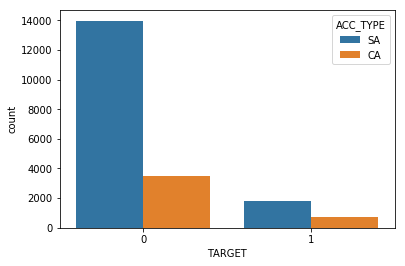

In [12]:
#Lets see this default rate as per account type.
sns.countplot(x = 'TARGET', data = bank, hue = 'ACC_TYPE')

In [20]:
X = bank.iloc[:,1:]
Y = bank.iloc[:,0]

In [19]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in bank.columns: # Loop through all columns in the dataframe
    if bank[feature].dtype == 'object': # Only apply for columns with categorical strings
        bank[feature] = pd.Categorical(bank[feature]).codes # Replace strings with an integer

# Here Dropping 3columns Because,these are Least Important Features after the Feature importance has been Done

In [56]:
X.drop(columns = ['NO_OF_IW_CHQ_BNC_TXNS','AMT_MIN_BAL_NMC_CHGS','AMT_OTH_BK_ATM_USG_CHGS'],axis = 1,inplace = True)


In [57]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.3)

# Invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option  could be gini index.  Restricting the depth of the tree to 5 (no particular reason for selecting this)


In [58]:
from sklearn.tree import DecisionTreeClassifier
                        
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 100 )

In [59]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [60]:
y_pred = dt_model.predict(x_val)

In [61]:
from sklearn import metrics


print("Accuracy:",metrics.accuracy_score(y_val, y_pred))


Accuracy: 0.9373333333333334


In [62]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_val, y_pred))  
print(classification_report(y_val, y_pred))  


[[5008  212]
 [ 164  616]]
             precision    recall  f1-score   support

          0       0.97      0.96      0.96      5220
          1       0.74      0.79      0.77       780

avg / total       0.94      0.94      0.94      6000



In [64]:
x_train.columns

Index(['AGE', 'GENDER', 'BALANCE', 'OCCUPATION', 'AGE_BKT', 'SCR',
       'HOLDING_PERIOD', 'ACC_TYPE', 'LEN_OF_RLTN_IN_MNTH', 'NO_OF_L_CR_TXNS',
       'NO_OF_L_DR_TXNS', 'TOT_NO_OF_L_TXNS', 'NO_OF_BR_CSH_WDL_DR_TXNS',
       'NO_OF_ATM_DR_TXNS', 'NO_OF_NET_DR_TXNS', 'NO_OF_MOB_DR_TXNS',
       'NO_OF_CHQ_DR_TXNS', 'FLG_HAS_CC', 'AMT_ATM_DR', 'AMT_BR_CSH_WDL_DR',
       'AMT_CHQ_DR', 'AMT_NET_DR', 'AMT_MOB_DR', 'AMT_L_DR',
       'FLG_HAS_ANY_CHGS', 'NO_OF_OW_CHQ_BNC_TXNS', 'AVG_AMT_PER_ATM_TXN',
       'AVG_AMT_PER_CSH_WDL_TXN', 'AVG_AMT_PER_CHQ_TXN', 'AVG_AMT_PER_NET_TXN',
       'AVG_AMT_PER_MOB_TXN', 'FLG_HAS_NOMINEE', 'FLG_HAS_OLD_LOAN'],
      dtype='object')

                          importance                   columns
SCR                         0.102115                       SCR
BALANCE                     0.096008                   BALANCE
LEN_OF_RLTN_IN_MNTH         0.064667       LEN_OF_RLTN_IN_MNTH
HOLDING_PERIOD              0.063875            HOLDING_PERIOD
NO_OF_L_CR_TXNS             0.058129           NO_OF_L_CR_TXNS
AMT_L_DR                    0.052572                  AMT_L_DR
TOT_NO_OF_L_TXNS            0.042507          TOT_NO_OF_L_TXNS
AVG_AMT_PER_CSH_WDL_TXN     0.042169   AVG_AMT_PER_CSH_WDL_TXN
AMT_ATM_DR                  0.041557                AMT_ATM_DR
AMT_CHQ_DR                  0.041464                AMT_CHQ_DR
AMT_BR_CSH_WDL_DR           0.039841         AMT_BR_CSH_WDL_DR
AGE                         0.036425                       AGE
AVG_AMT_PER_NET_TXN         0.035436       AVG_AMT_PER_NET_TXN
AVG_AMT_PER_CHQ_TXN         0.034571       AVG_AMT_PER_CHQ_TXN
AVG_AMT_PER_ATM_TXN         0.026335       AVG_AMT_PER_

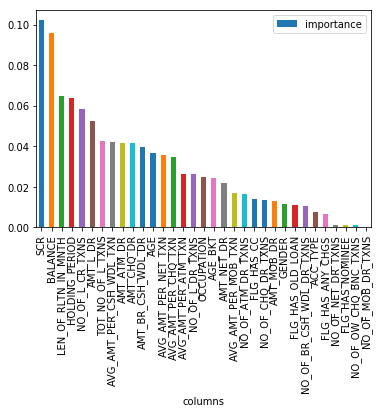

In [65]:
import pandas as pd
import matplotlib
feature_importances = pd.DataFrame(dt_model.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances
feature_importances['columns']=feature_importances.index
print(feature_importances)

feature_importances.plot(kind='bar',x='columns',y='importance')


In [27]:
import cufflinks as cf
#Import the modules to work with offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
#connect the javascript to the notebook with the init_notebook_mode mode
#with the coonected argument set to True
init_notebook_mode(connected = True)
cf.go_offline()
import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

In [66]:
iplot([{"x":feature_importances['columns'], "y":feature_importances['importance']}])

In [67]:
train_char_label = ['0', '1']

In [68]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

Bank_Tree_File = open('bank_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Bank_Tree_File, feature_names = list(x_train), class_names = list(train_char_label))

Bank_Tree_File.close()



In [69]:
# You can also copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view 
#or create a .png as below

system("dot -Tpng bank_tree.dot -o Bank_tree.png")   # This command is to the OS
Image("Bank_tree.png")        # use the image command to read the .png file and print on screen